# AMGEN Stock Data Analysis

Author: Zhangli(Johnny) Hu

In this project, I'll analyze Amgen stock data extracted from Yahoo finance. This project will answer the following basic quesitons about the time series data analysis of Amgen stock.
* What was the Amgen stock price and volume over time? 
* What was the moving average of Amgen stock over different time period?
* What was the daily return percentage of Amgen stock?
* What was the correlation between daily returns of different biotechnology companies?
* How to quantify the risk of the different stocks?

In [1]:
# Install all the dependencies required for this project, 
# This is easy for user to reproduce the results produced in this project

# ! pip install -r requirements.txt

In [2]:
# Install the required libraries seperately in case requirement.txt does not work

# ! pip install --upgrade pip
# ! pip install seaborn
# ! pip install datetime
# ! pip install -U pandas==0.19.2
# ! pip install pandas_datareader
# ! pip install fix_yahoo_finance --upgrade --no-cache-dir
# ! pip install pipreqs

In [3]:
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
from plotly import tools
import plotly.figure_factory as ff

In [4]:
# Specify the stock name
stock = "AMGN"      

# Setting the start time and end time, e.g. All the historical data or past five years data
end_date = datetime.now().date()
# start_date = datetime(1983,6,17).date()       # Use all the historical data
start_date = datetime(end_date.year-5,end_date.month,end_date.day).date()

Download the Amgen stock data from Yahoo Finance as a pandas DataFrame and print it out to see if I get the right data

In [5]:
# Download the Amgen data from Yahoo as a pandas DataFrame
# Note: The yahoo libaray may not work some time, wait for a few seconds and rerun the cell
Amgen = yf.download("AMGN", start_date, end_date)
Amgen.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-11-04  118.730003  119.699997  116.889999  117.279999  104.136940   
2013-11-05  116.330002  116.870003  114.849998  115.139999  102.236755   
2013-11-06  116.250000  116.290001  113.089996  113.330002  100.629593   
2013-11-07  114.160004  115.250000  110.650002  111.029999   98.587357   
2013-11-08  111.410004  113.970001  111.269997  113.209999  100.523048   

             Volume  
Date                 
2013-11-04  2248700  
2013-11-05  3299300  
2013-11-06  3494200  
2013-11-07  3827400  
2013-11-08  3060000

Calculating some descriptive statistics about the stock price

In [6]:
Amgen.describe()

Open         High          Low        Close    Adj Close  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean    158.299293   159.811382   156.677164   158.289349   149.388148   
std      22.575439    22.737905    22.485738    22.626821    25.757339   
min     110.500000   111.570000   108.199997   110.290001    98.587357   
25%     147.135002   148.660004   145.370002   147.239998   137.748459   
50%     160.460007   162.279999   158.940002   160.449997   148.827057   
75%     173.069999   174.529998   171.394997   173.279998   167.192802   
max     208.539993   210.190002   206.839996   208.889999   208.889999   

             Volume  
count  1.259000e+03  
mean   3.432506e+06  
std    1.780547e+06  
min    9.430000e+05  
25%    2.432850e+06  
50%    3.031700e+06  
75%    3.963050e+06  
max    2.393680e+07

From the above table, we can see the mean, standard deviation, minimum, maximum value of stock price over the past 5 years.

## What was the stock price and volume over time? 
*Note that the adjusted closing price is used here*

**An adjusted closing price** is a stock's closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time before the next day's open. The adjusted closing price is often used when examining historical returns or performing a detailed analysis of historical return. For more informaiton, reader can refer to [Adjusted Closing Price](https://www.investopedia.com/terms/a/adjusted_closing_price.asp)

**Volume** is the number of shares or contracts traded in a security or an entire market during a given period of time. It is an important indicator in technical analysis as it is used to measure the relative worth of a market move. If the markets make a strong price movement, then the strength of that movement depends on the volume for that period. The higher the volume during the price move, the more significant the move. Read more on [Volume](https://www.investopedia.com/terms/v/volume.asp)


In [7]:
# Use plotly to creat interactive plot
init_notebook_mode()
trace1 = Scatter(x=list(Amgen.index), y=list(Amgen['Adj Close']), name = 'Stock price($)')
trace2 = Scatter(x=list(Amgen.index), y=list(Amgen['Volume']/1e5), name = 'Volume(10^5)')
data = [trace1,trace2]
layout = dict(
    title='Time series data for Amgen Stock',
    width=1000,
    height=600,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible = True),
        type='date'
    )
)
fig = dict(data=data, layout=layout)
iplot(fig)

## What was the moving average of Amgen stock over different time period?
**A moving average (MA)** is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices. Moving averages lag current price action because they are based on past prices; the longer the time period for the moving average, the greater the lag. Thus, a 200-day MA will have a much greater degree of lag than a 20-day MA because it contains prices for the past 200 days. The length of the moving average to use depends on the trading objectives, with shorter moving averages used for short-term trading and longer-term moving averages more suited for long-term investors.

For more information, reader can refer to [Moving Average](https://www.investopedia.com/terms/m/movingaverage.asp)

In [8]:
ma_day = [10, 50, 100]
# Use pandas Series rolling window calculations to compute the mean of moving window
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))  # Add MA to the dataframe
    Amgen[column_name] = Amgen['Adj Close'].rolling(ma).mean()
# Print the tail of dataframe to check the MA
Amgen.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-10-26  185.399994  187.330002  183.279999  185.979996  185.979996   
2018-10-29  189.320007  190.910004  184.800003  188.190002  188.190002   
2018-10-30  189.429993  191.000000  187.029999  189.080002  189.080002   
2018-10-31  189.080002  195.330002  189.039993  192.789993  192.789993   
2018-11-01  192.809998  194.380005  190.960007  192.899994  192.899994   

             Volume  MA for 10 days  MA for 50 days  MA for 100 days  
Date                                                                  
2018-10-26  4580400      196.284001      200.429200       194.894952  
2018-10-29  3829500      195.544002      200.244600       194.956243  
2018-10-30  4040600      194.218002      200.075001       195.016502  
2018-10-31  4541000      193.220001      199.984600       195.110782  
2018-11-01  2797100      192.238000      199.885800       195.201593

In [9]:
trace1 = Scatter(x=list(Amgen.index), y=list(Amgen['Adj Close']), name = 'Stock price($)')
trace2 = Scatter(x=list(Amgen.index), y=list(Amgen['MA for 10 days']), name = 'MA for 10 days')
trace3 = Scatter(x=list(Amgen.index), y=list(Amgen['MA for 50 days']), name = 'MA for 50 days')
trace4 = Scatter(x=list(Amgen.index), y=list(Amgen['MA for 100 days']), name = 'MA for 500 days')
data = [trace1, trace2, trace3, trace4]
fig = dict(data=data, layout=layout)
iplot(fig)

**Insights:** As you can see from the figure, the longer the time period for the moving average, the smoother the plot is. And from the MA for 100 days, we can see an upward trend of Amgen stock since September 2014.

## What was the daily return percentage of Amgen stock?

Stock prices change on a daily basis, altering the value of your investments. You may calculate daily stock returns to monitor the magnitude of this change.The daily return measures the dollar change in a stock’s price as a percentage of the previous day’s closing price. A positive return means the stock has grown in value, while a negative return means it has lost value. A stock with lower positive and negative daily returns is typically less risky than a stock with higher daily returns, which create larger swings in value. For more informaiton, please read [daily return](https://pocketsense.com/calculate-daily-stock-return-5138.html)

Use the following formula to calculate the daily return

\begin{equation*}
\frac{AdjClose_{today}-AdjClose_{yesterday}}{AdjClose_{yesterday}}
\end{equation*}

In [10]:
# Use pandas pct_change to calculate the percentage change between the current day price and prior day price 
Amgen['Daily Return'] = Amgen['Adj Close'].pct_change(periods=1)
Amgen['Daily Return'].tail()

Date
2018-10-26   -0.011271
2018-10-29    0.011883
2018-10-30    0.004729
2018-10-31    0.019621
2018-11-01    0.000571
Name: Daily Return, dtype: float64

In [11]:
trace1 = Scatter(x=list(Amgen.index), y=list(Amgen['Daily Return']))
data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig)

In [12]:
# Plot the distribution of daily 
hist_data = [Amgen['Daily Return'].dropna()]
group_labels = ['Daily Return distplot']
fig = ff.create_distplot(hist_data,group_labels,bin_size=[.001],colors=['rgb(255,165,0)'])
iplot(fig)
print('mean=%.5f stdv=%.4f' % (Amgen['Daily Return'].mean(), Amgen['Daily Return'].std()))

mean=0.00060 stdv=0.0149


**Insights:** The mean value of daily return is slightly larger than zero. This indicates that positive daily returns are slightly more frequent than negative returns for Amgen. Next I would like to compare the daily return for different biotechnology companies.

## What was the correlation between daily returns of different biotechnology companies?

In [13]:
# Here I add the stock prices from Novartis, Gilead, Celgene and Biogen
stock_list = ['AMGN','NVS','GILD','CELG','BIIB']
# Only extract 'Adj Close' column
Adj_Close_df = yf.download(stock_list, start_date, end_date)['Adj Close']
Adj_Close_df.head()

[*********************100%***********************]  5 of 5 downloaded


AMGN        NVS       CELG        BIIB       GILD
Date                                                               
2013-11-04  104.136940  66.245201  75.360001  240.070007  63.608585
2013-11-05  102.236755  65.062248  75.370003  244.059998  63.792076
2013-11-06  100.629593  65.831161  72.245003  238.479996  61.792255
2013-11-07   98.587357  64.969307  72.495003  231.190002  60.205246
2013-11-08  100.523048  65.273491  74.459999  236.690002  61.801430

Next the daily return is calculated as before.

In [14]:
DayReturn_df = Adj_Close_df.pct_change(periods=1)
DayReturn_df.tail()

AMGN       NVS      CELG      BIIB      GILD
Date                                                        
2018-10-26 -0.011271 -0.005248 -0.003713  0.005696  0.016322
2018-10-29  0.011883  0.009380 -0.014079  0.002632  0.016633
2018-10-30  0.004729  0.006273  0.012740  0.017677  0.016079
2018-10-31  0.019621  0.009581 -0.010229 -0.006563 -0.053581
2018-11-01  0.000571  0.008461  0.056006  0.036349  0.031241

Then I will visualize the correlation between the daily return of Amgen stock and itself

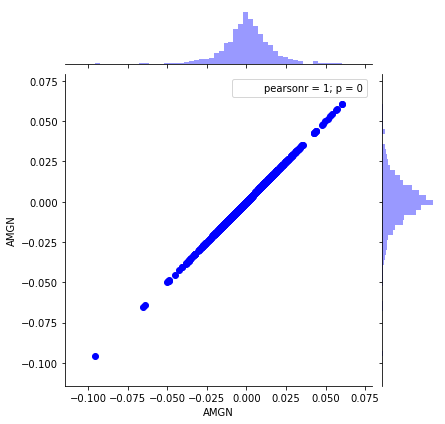

In [15]:
# Use seaborn to plot the correlation
%matplotlib inline
sns.jointplot('AMGN','AMGN', DayReturn_df, kind='scatter',color='blue')

As expected, [the pearson r](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is 1 and the Amgen daily return is perfectly correlated to itself. Note that the pearson r is a measure of the linear correlation between two variables. 

The degree of correlation can be roughly classfied into following five levels:
* Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
* High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
* Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
* Low degree: When the value lies below + .29, then it is said to be a small correlation.
* No linear correlation: When the value is zero


Next, let's check the correlation between Amgen and Gilead.

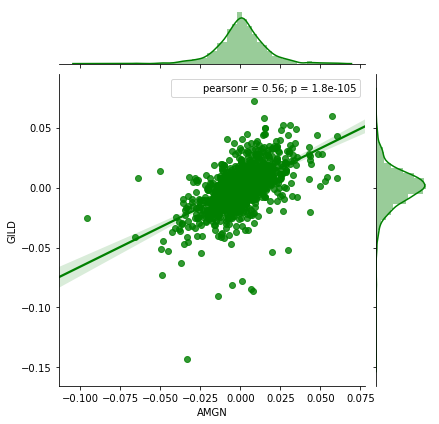

In [16]:
sns.jointplot('AMGN','GILD', DayReturn_df, kind='reg',color='green')

As the above figure shows, there is a moderate positive correlation between Amgen and Gilead daily return. Now, let's visualize the correlation scatterplot and correlation matrix.

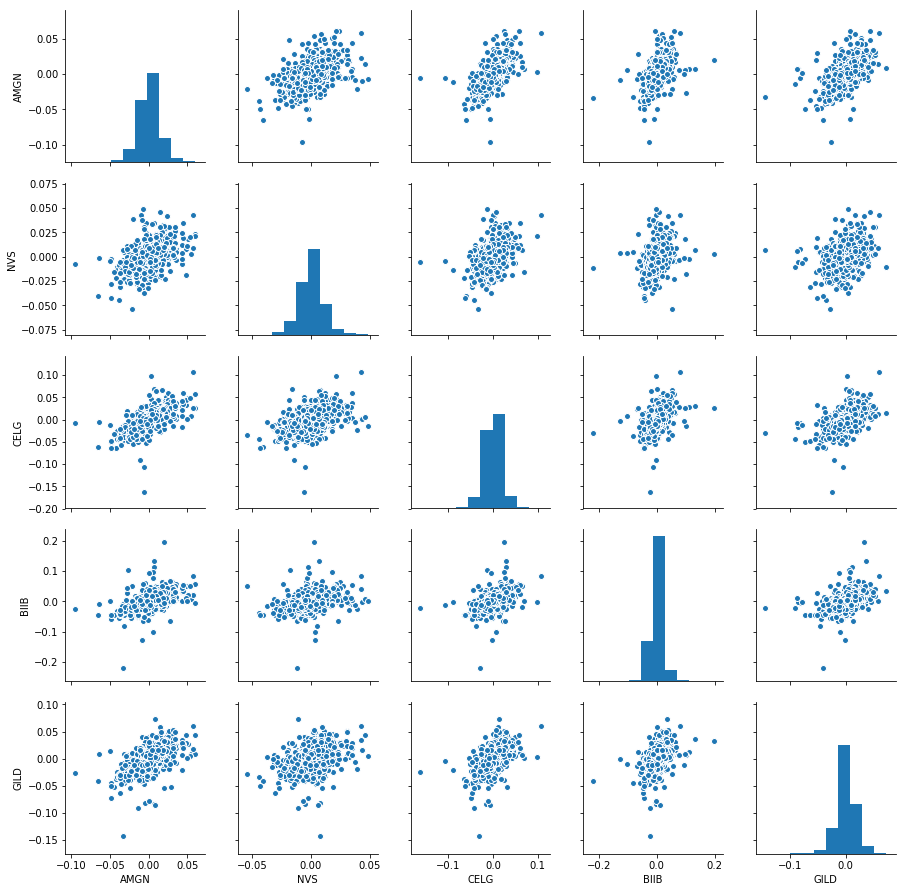

In [17]:
sns.pairplot(DayReturn_df.dropna())

In [18]:
# Compute the correlation matrix
corr = DayReturn_df.corr()
corr.style.background_gradient().set_precision(3)

**Insights:** We can see that Amgen, Novartis, Gilead, Celgene and Biogen all appear to be linearly positively correlated, with Celgene exhibiting the highest correlation to Amgen. That means if the shareholder obtains a positive daily return from Amgen, it is highly probable that the shareholder will also get a positive return from Celgene.

## How to quantify the risk of the stock?

A simple way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns here) with the standard deviation of the daily returns.

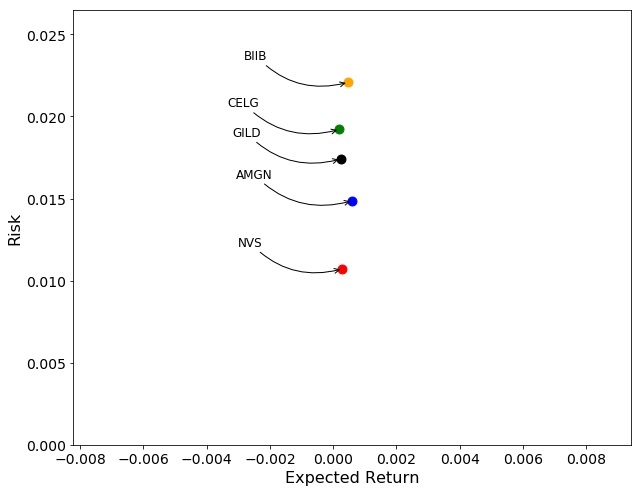

In [19]:
DayReturn = DayReturn_df.dropna()
plt.figure(figsize=(10,8))

# plt.scatter(DayReturn.mean(),DayReturn.std(),s=25)

plt.xlabel('Expected Return',fontsize=16)
plt.ylabel('Risk',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
colors = ['blue','red','green','orange','black']
plt.ylim(0, DayReturn.std().max()*1.2)

#For adding annotatios in the scatterplot
for label,x,y,color in zip(DayReturn.columns, DayReturn.mean(),DayReturn.std(),colors):
    plt.scatter(x,y,color=color, s=80)
    plt.annotate(
    label,
    xy=(x,y),xytext=(-80,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom', size=12,
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=0.3'))

**Insights:** As you can see from the figure, Amgen is the best choice considering the balance between risk and expected return. 